In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
#read data
df = pd.read_csv('Heart Disease Dataset.csv')

In [3]:
#summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Declare feature vector and target variable 

X = df.drop(['target'], axis=1)
y = df['target']

In [6]:
#Split data into separate training and test set 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, stratify=y, test_size=0.25)

In [7]:
# merge x and y for training and test

data_train = pd.concat([X_train, y_train], axis=1, sort=False)
data_test = pd.concat([X_test, y_test], axis=1, sort=False)

In [8]:
#Import packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

**decision tree classifier with parameter criterion='gini'**

In [9]:
#Decision tree function with gini index
df_gini = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=10)

In [10]:
#Fitting the model with gini index
df_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=10)

In [11]:
#Predict test result with gini index
y_pred_gini = df_gini.predict(X_test)

In [12]:
#Check accuracy score
from sklearn.metrics import accuracy_score

print('Skor akurasi model dengan index gini: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Skor akurasi model dengan index gini: 0.7632


In [13]:
#Compare train-set with test-set accuracy

y_pred_train_gini = df_gini.predict(X_train)
print('Skor akurasi training set menggunakan index gini: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Skor akurasi training set menggunakan index gini: 1.0000


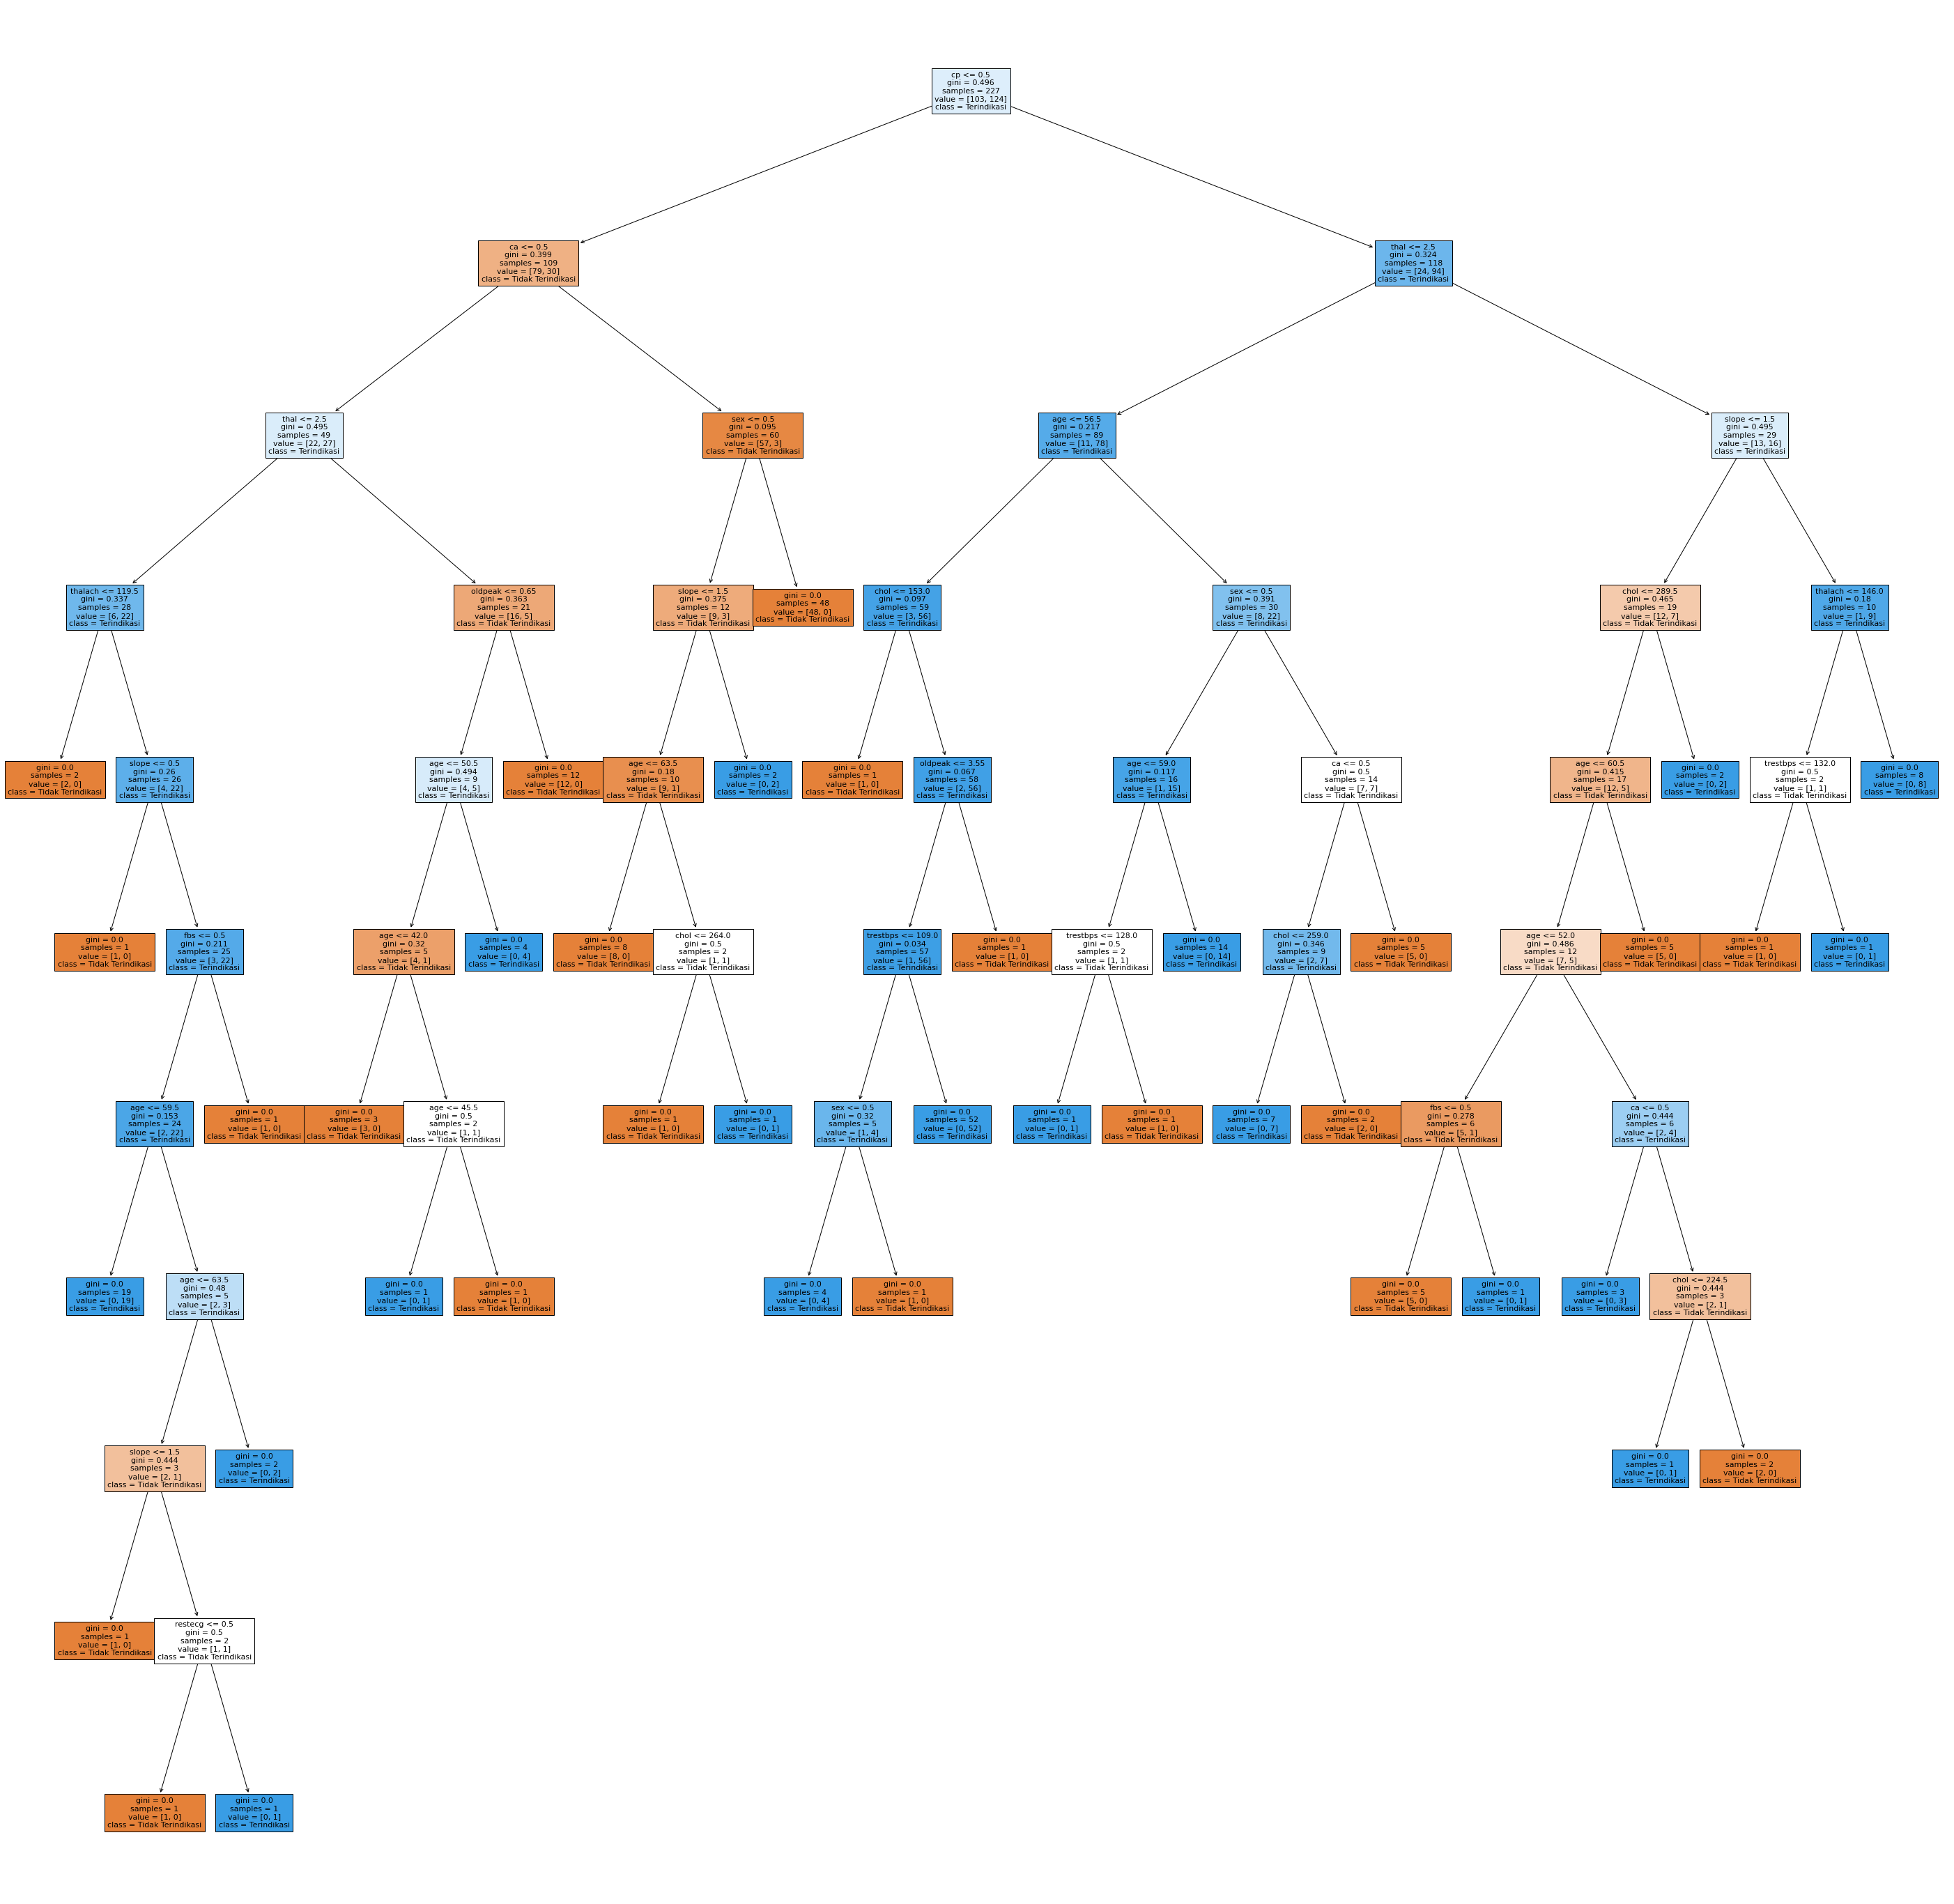

In [14]:
#Visualize decision-trees
from sklearn import tree

plt.figure(figsize=(50,50))
tree_gini = tree.plot_tree(df_gini,feature_names=X_train.columns,class_names=['Tidak Terindikasi', 'Terindikasi'], \
                           filled=True) 

**decision tree classifier with parameter criterion='entropy'**

In [15]:
#Decision tree function with entropy
df_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=10)

In [16]:
#Fitting the model with entropy
df_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=10)

In [17]:
#Predict test result with entropy
y_pred_en = df_entropy.predict(X_test)

In [18]:
#Check accuracy score
from sklearn.metrics import accuracy_score

print('Skor akurasi model dengan entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Skor akurasi model dengan entropy: 0.7500


In [19]:
#Compare train-set with test-set accuracy

y_pred_train_en = df_entropy.predict(X_train)
print('Skor akurasi training set menggunakan entropy: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Skor akurasi training set menggunakan entropy: 1.0000


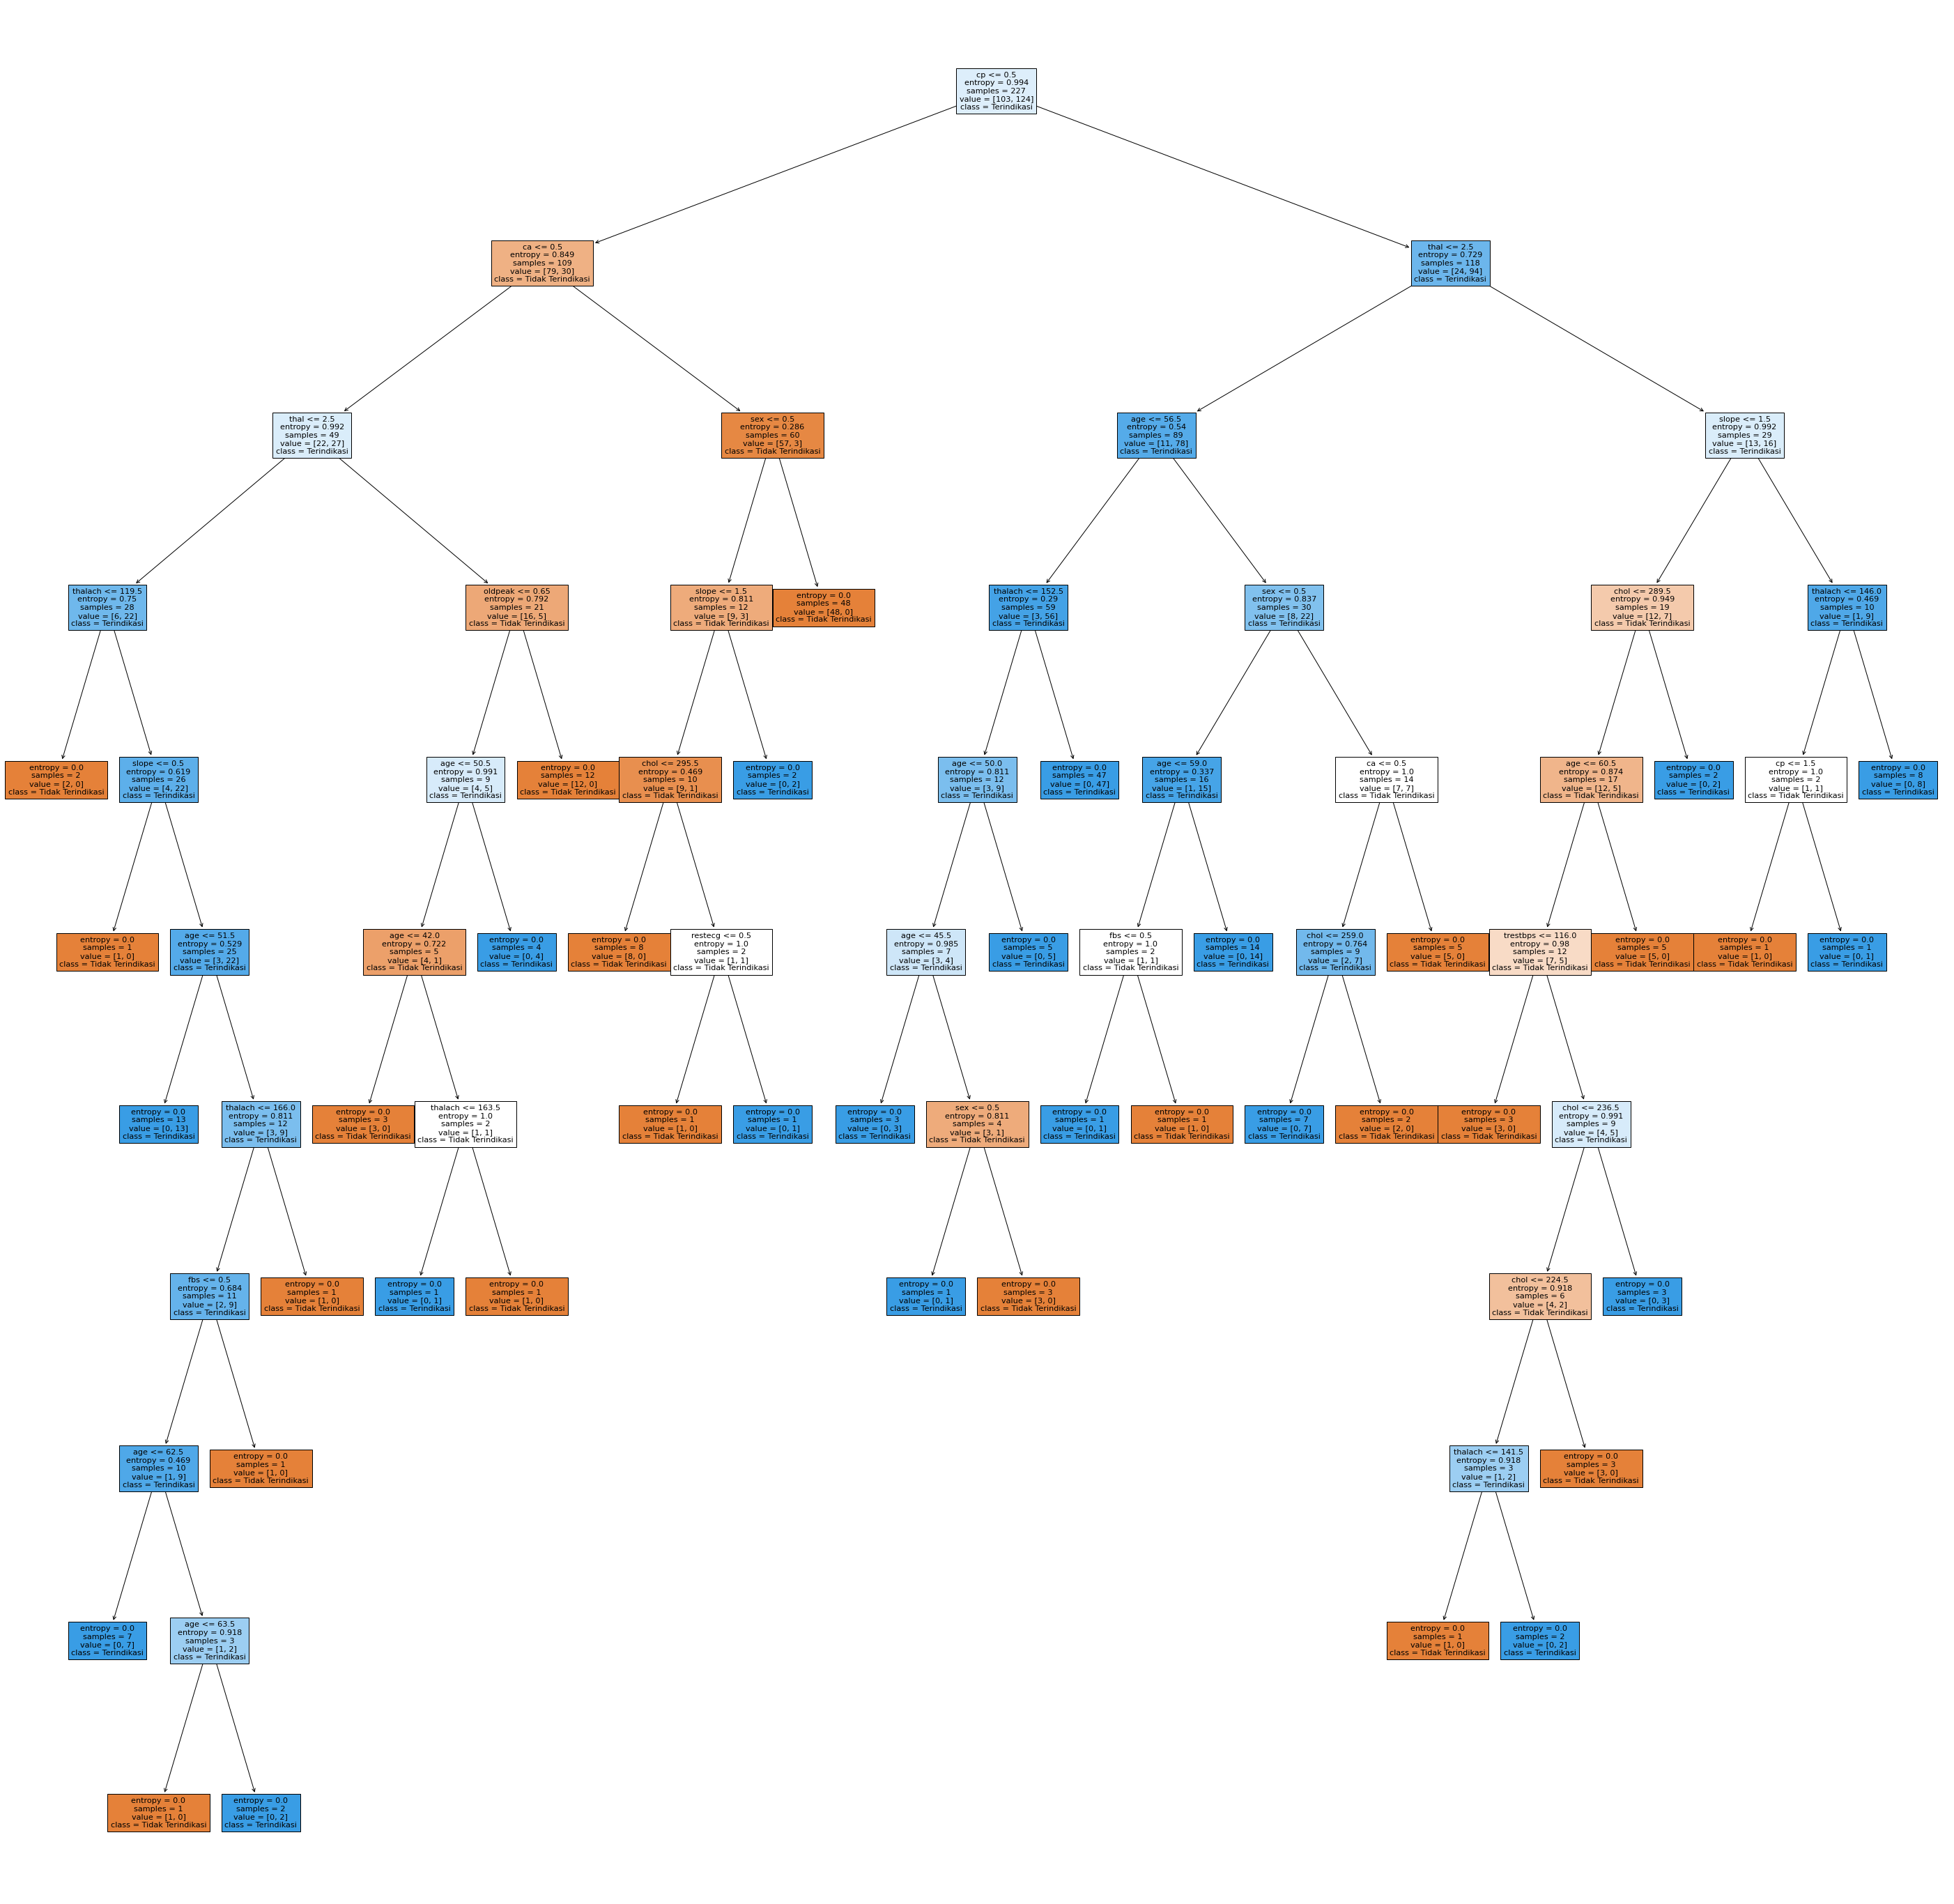

In [20]:
plt.figure(figsize=(50,50))
tree_entropy = tree.plot_tree(df_entropy,feature_names=X_train.columns,class_names=['Tidak Terindikasi', 'Terindikasi'], \
                           filled=True) 

# significant attribute : binomial logistic regression

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [23]:
formula = ('target ~ age + sex + cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope + ca + thal')
model = logit(formula=formula, data=data_train).fit()

Optimization terminated successfully.
         Current function value: 0.322486
         Iterations 8


In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  227
Model:                          Logit   Df Residuals:                      213
Method:                           MLE   Df Model:                           13
Date:                Sat, 12 Dec 2020   Pseudo R-squ.:                  0.5319
Time:                        19:54:30   Log-Likelihood:                -73.204
converged:                       True   LL-Null:                       -156.37
Covariance Type:            nonrobust   LLR p-value:                 1.025e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0123      3.303      0.004      0.997      -6.461       6.486
age            0.0016      0.029      0.057      0.954      -0.055       0.058
sex           -1.9582      0.605     -3.239      0.001      -3.143      -0.773
cp             0.9718      0.232      4.190      0.000       0.517       1.426
trestbps      -0.0030      0.013     -0.226      0.821      -0.029       0.023
chol          -0.0060      0.004     -1.388      0.165      -0.015       0.002
fbs           -0.6062      0.699     -0.867      0.386      -1.976       0.764
restecg        0.5586      0.412      1.355      0.175      -0.249       1.366
thalach        0.0371      0.013      2.838      0.005       0.011       0.063
exang         -0.6100      0.527     -1.157      0.247      -1.643       0.423
oldpeak       -0.6129      0.276     -2.219      0.026      -1.154      -0.072
slope          0.4031      0.419      0.962      0.336      -0.418       1.225
ca            -0.8219      0.224     -3.672      0.000      -1.261      -0.383
thal          -1.1318      0.362     -3.130      0.002      -1.840      -0.423
==============================================================================
"""

Significant attribute : p-value < 0.05
- sex
- cp
- thalach
- oldpeak
- ca
- thal

**model**

In [25]:
data_logit = df[['sex', 'cp', 'thalach', 'oldpeak', 'ca', 'thal', 'target']]
data_logit.head()

,sex,cp,thalach,oldpeak,ca,thal,target
0,1,3,150,2.3,0,1,1
1,1,2,187,3.5,0,2,1
2,0,1,172,1.4,0,2,1
3,1,1,178,0.8,0,2,1
4,0,0,163,0.6,0,2,1


In [26]:
#Split data into separate training and test set 
X_logit = data_logit.drop(['target'], axis=1)
y_logit = data_logit['target']

Xlogit_train, Xlogit_test, ylogit_train, ylogit_test = train_test_split(X_logit, y_logit, random_state=101, stratify=y, \
                                                                        test_size=0.25)

In [27]:
# decision tree classifier with parameter criterion = 'gini'

df_gini_logit = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=10)

In [28]:
#Fitting the model with gini index
df_gini_logit.fit(Xlogit_train, ylogit_train)

DecisionTreeClassifier(max_depth=10, random_state=10)

In [29]:
#Predict test result with gini index
ylogit_pred_gini = df_gini_logit.predict(Xlogit_test)

In [30]:
#Check accuracy score

print('Skor akurasi model dengan index gini: {0:0.4f}'. format(accuracy_score(ylogit_test, ylogit_pred_gini)))

Skor akurasi model dengan index gini: 0.8026


In [31]:
#Compare train-set with test-set accuracy

ylogit_pred_train_gini = df_gini_logit.predict(Xlogit_train)
print('Skor akurasi training set menggunakan index gini: {0:0.4f}'. format(accuracy_score(ylogit_train, \
                                                                                          ylogit_pred_train_gini)))

Skor akurasi training set menggunakan index gini: 1.0000


In [32]:
# decision tree classifier with parameter criterion = 'entropy'

df_entropy_logit = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=10)

In [33]:
#Fitting the model with entropy index
df_entropy_logit.fit(Xlogit_train, ylogit_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=10)

In [34]:
#Predict test result with entropy index
ylogit_pred_entropy = df_entropy_logit.predict(Xlogit_test)

In [35]:
#Check accuracy score

print('Skor akurasi model dengan index entropy: {0:0.4f}'. format(accuracy_score(ylogit_test, ylogit_pred_entropy)))

Skor akurasi model dengan index entropy: 0.8289


In [36]:
#Compare train-set with test-set accuracy

ylogit_pred_train_entropy = df_entropy_logit.predict(Xlogit_train)
print('Skor akurasi training set menggunakan index entropy: {0:0.4f}'. format(accuracy_score(ylogit_train, \
                                                                                          ylogit_pred_train_entropy)))

Skor akurasi training set menggunakan index entropy: 0.9912


**hasil akhir yang dipakai :**
- decision tree classifier dengan parameter criterion = 'entropy'
- significant attributes didapat dari hasil binomial logistic regression

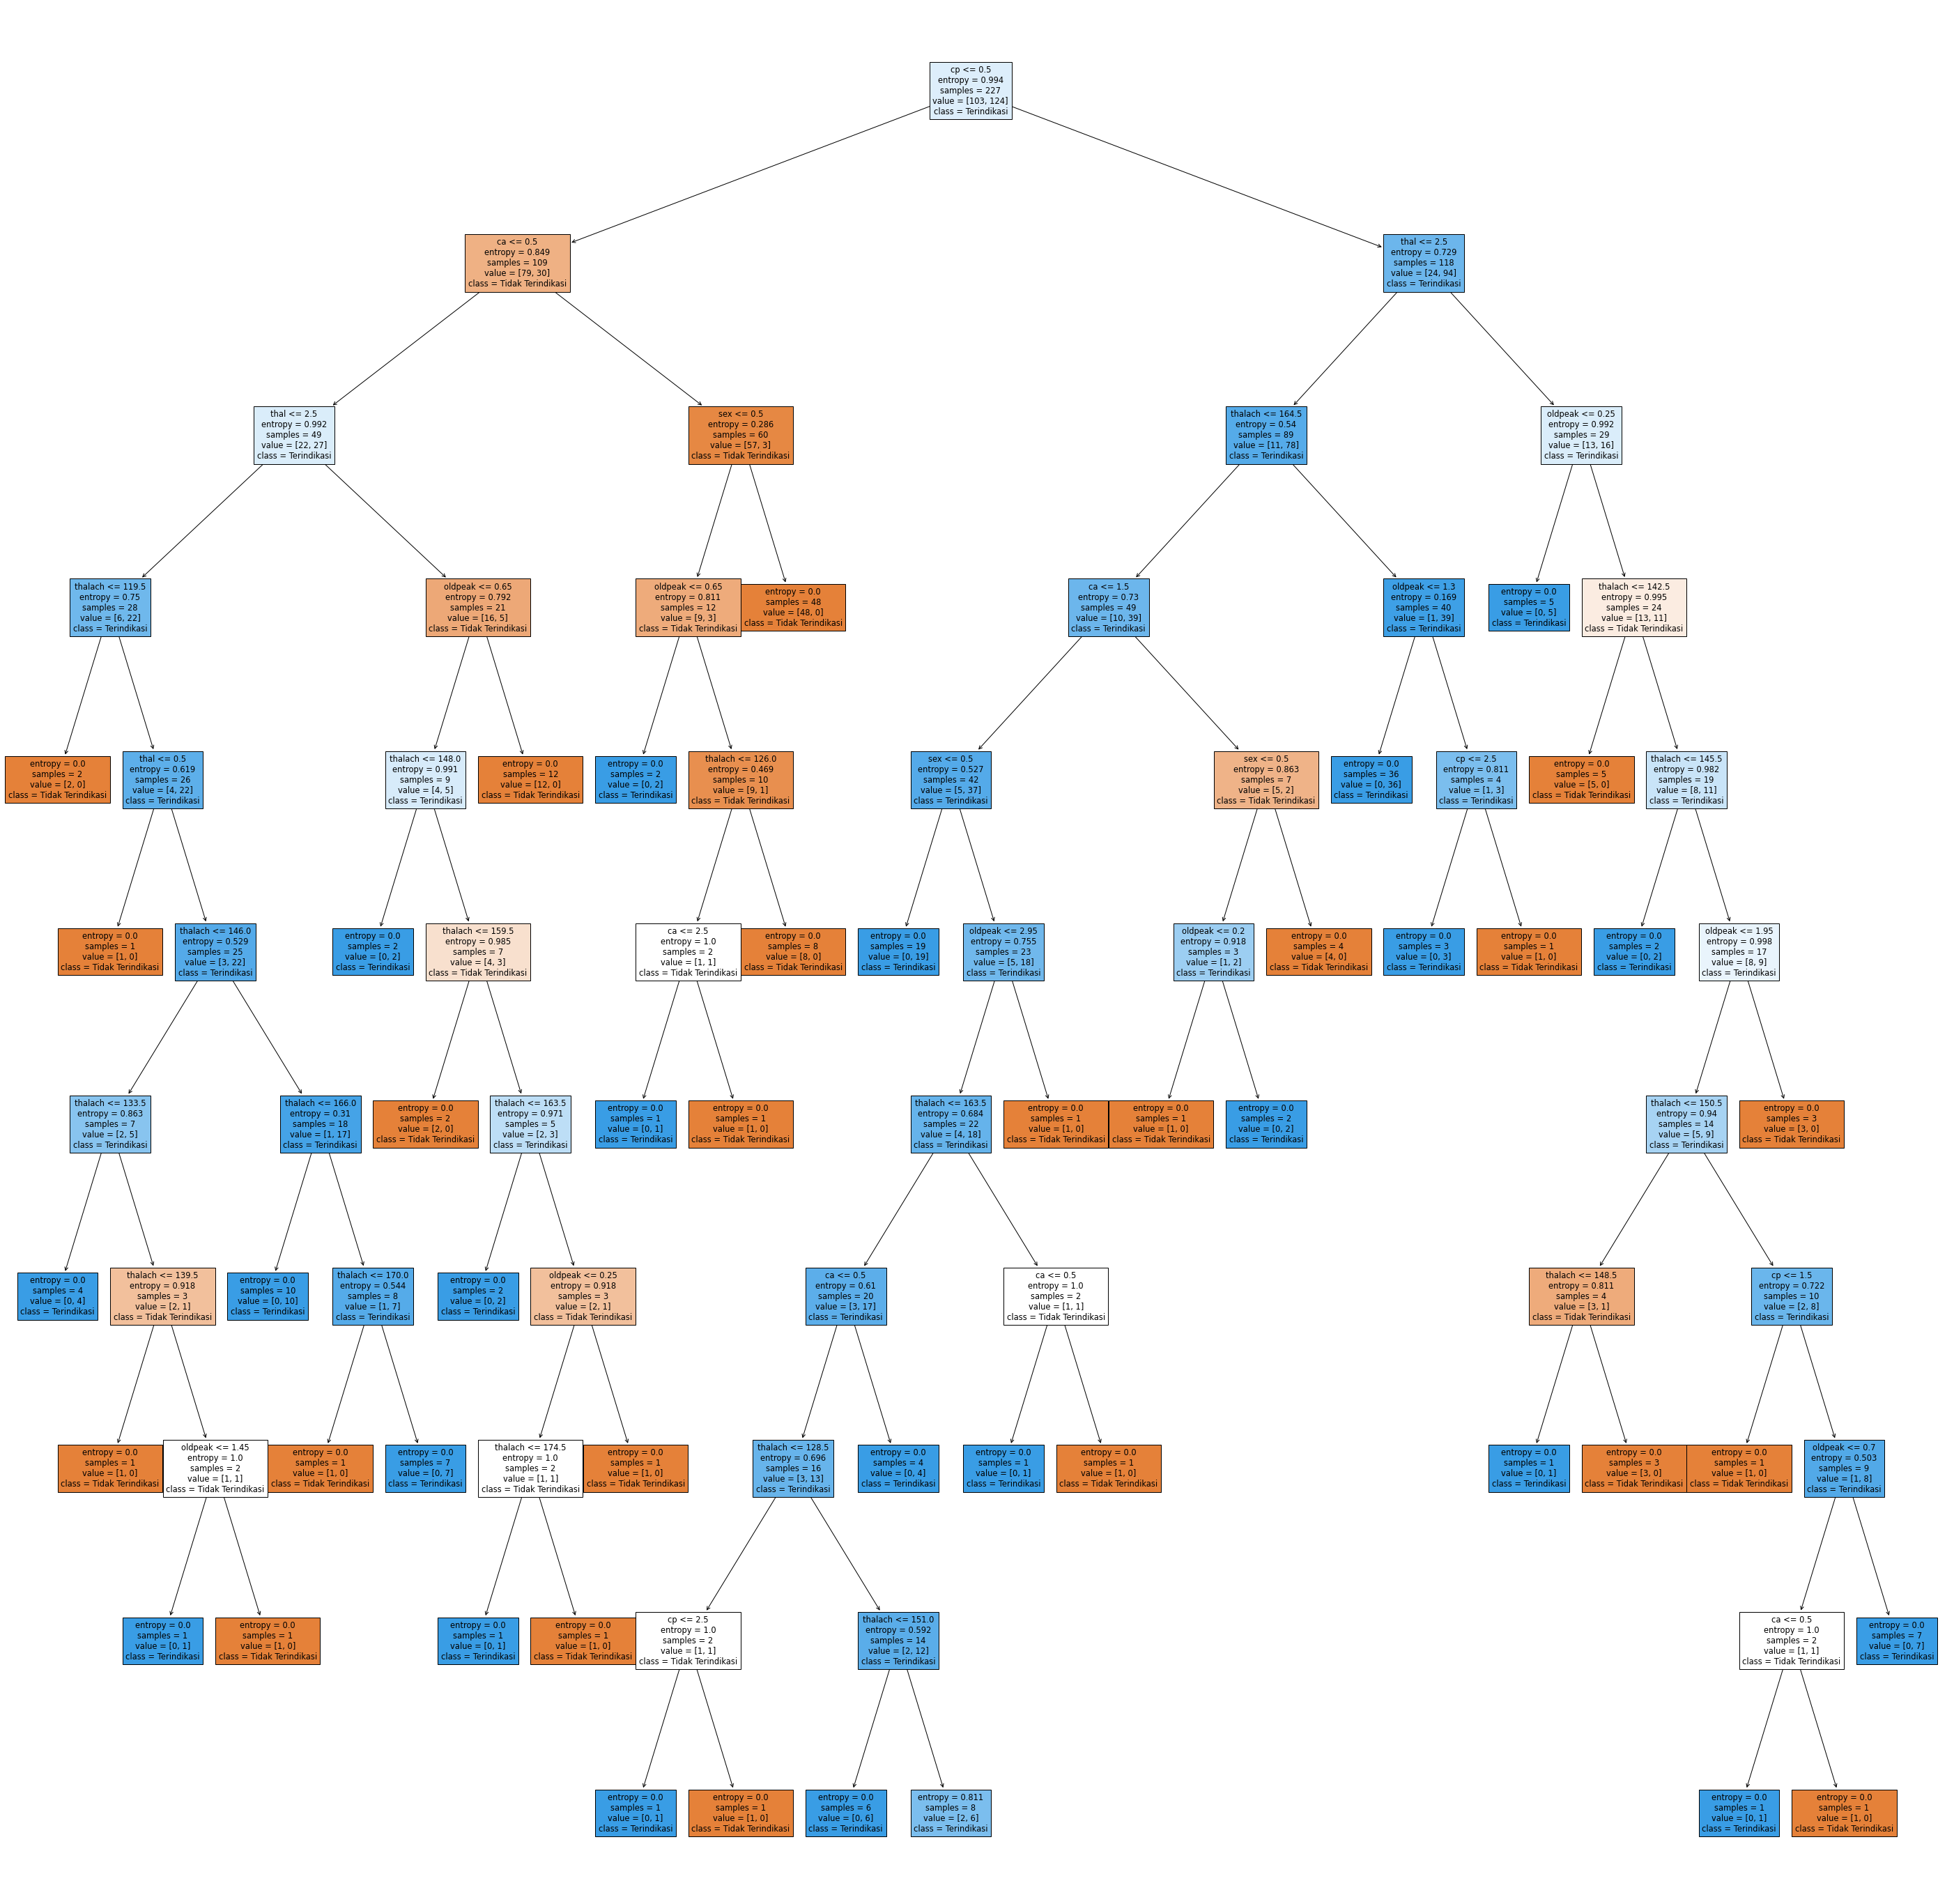

In [37]:
plt.figure(figsize=(50,50))
tree_entropy_logit = tree.plot_tree(df_entropy_logit,feature_names=Xlogit_train.columns,class_names=['Tidak Terindikasi', 'Terindikasi'], \
                           filled=True) 

#  significant attribute : grid search
Title: heart disease prediction using decision tree
<br>Author: Dibyajit Dhara
<br>Date: 2020
<br>Code Version: 1.0
<br>Availability: https://www.kaggle.com/sifodhara/heart-disease-prediction-using-decision-tree/log


**hyper parameter tuning using grid search**

In [38]:
params = {'max_depth':[2,3,4,5,6,7,8,9,10],
          'min_samples_split':[5,10,25,50,75,100,150]}

In [39]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=df_gini,param_grid=params,scoring='accuracy',n_jobs=-1,verbose=1) ## create grid search object

In [40]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:    3.1s finished


GridSearchCV(estimator=DecisionTreeClassifier(max_depth=10, random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [5, 10, 25, 50, 75, 100, 150]},
             scoring='accuracy', verbose=1)

In [41]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=10)

In [42]:
best_dt = grid_search.best_estimator_

**model**

In [43]:
from sklearn.metrics import confusion_matrix

print("train confusion matrix : ",confusion_matrix(y_train,best_dt.predict(X_train)))
print("train accuracy score : ",accuracy_score(y_train,best_dt.predict(X_train)))
print("__"*50)
print("test confusion matrix : ",confusion_matrix(y_test,best_dt.predict(X_test)))
print("test accuracy score : ",accuracy_score(y_test,best_dt.predict(X_test)))    

train confusion matrix :  [[ 85  18]
 [ 15 109]]
train accuracy score :  0.8546255506607929
____________________________________________________________________________________________________
test confusion matrix :  [[25 10]
 [ 5 36]]
test accuracy score :  0.8026315789473685


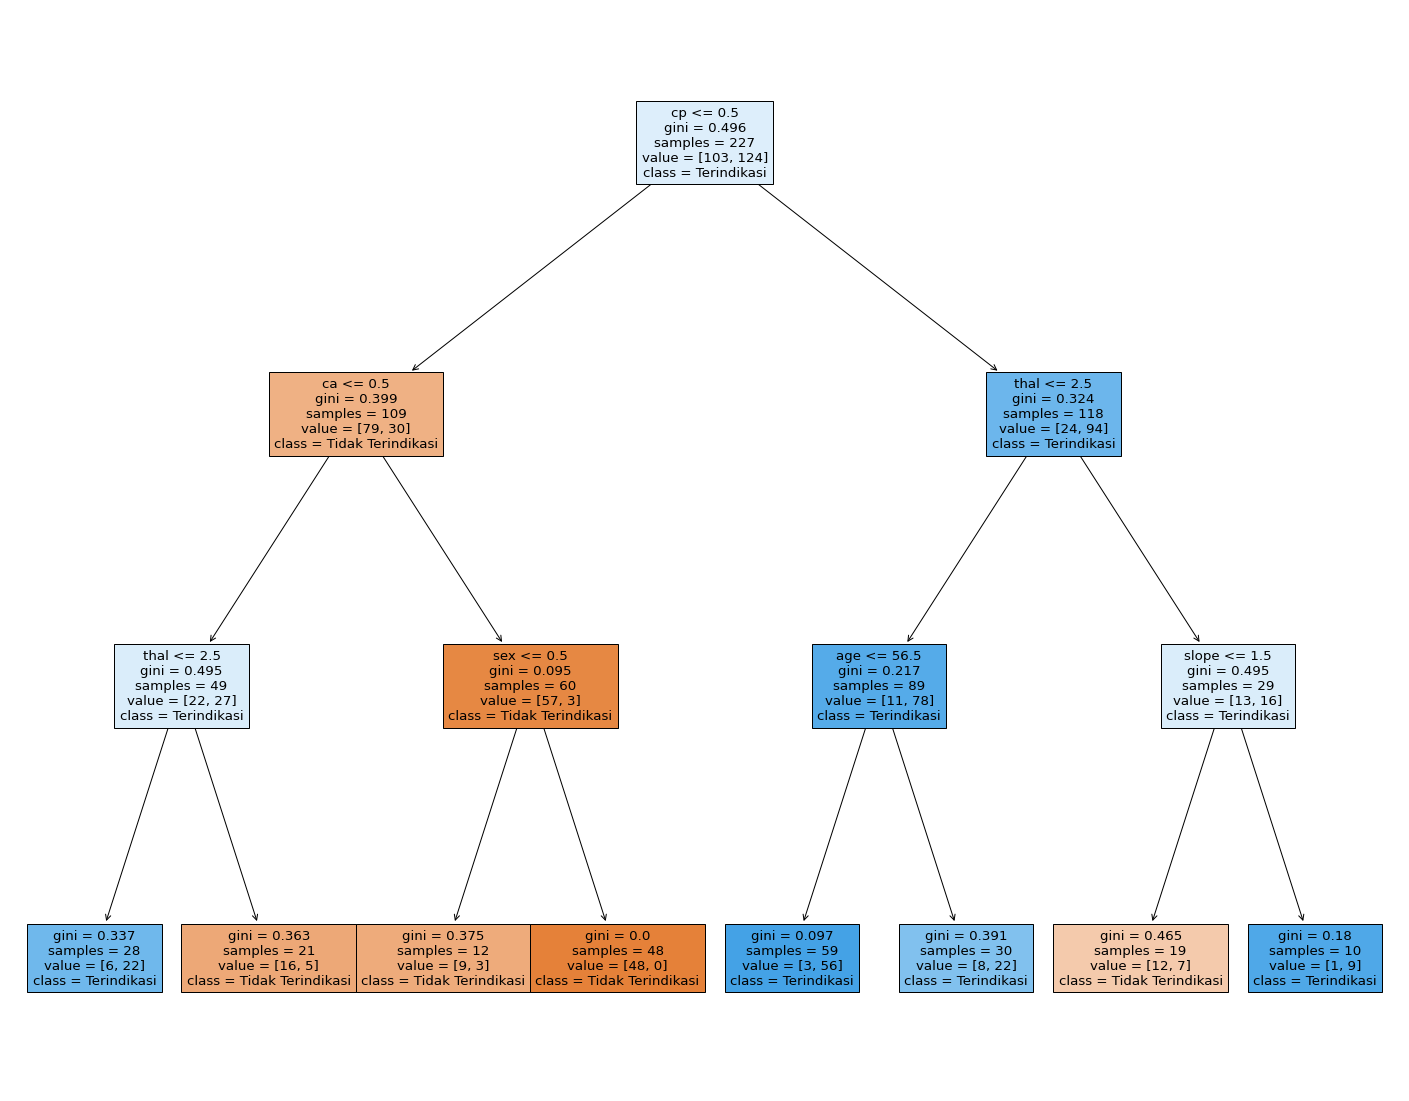

In [44]:
fig = plt.figure(figsize=(25,20))

dt_plot = tree.plot_tree(best_dt,feature_names=X_train.columns,class_names=['Tidak Terindikasi', 'Terindikasi'],filled=True)

significant attribute : cp, ca, thal, sex, age, slope

**model decision tree classifier**

In [45]:
data_gs = df[['sex', 'cp', 'ca', 'thal', 'age', 'slope', 'target']]
data_gs.head()

,sex,cp,ca,thal,age,slope,target
0,1,3,0,1,63,0,1
1,1,2,0,2,37,0,1
2,0,1,0,2,41,2,1
3,1,1,0,2,56,2,1
4,0,0,0,2,57,2,1


In [46]:
#Split data into separate training and test set 
X_gs = data_gs.drop(['target'], axis=1)
y_gs = data_gs['target']

Xgs_train, Xgs_test, ygs_train, ygs_test = train_test_split(X_gs, y_gs, random_state=101, stratify=y, test_size=0.25)

In [47]:
# decision tree classifier with parameter criterion = 'gini'

df_gini_gs = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=10)

In [48]:
#Fitting the model with gini index
df_gini_gs.fit(Xgs_train, ygs_train)

DecisionTreeClassifier(max_depth=10, random_state=10)

In [49]:
#Predict test result with gini index
ygs_pred_gini = df_gini_gs.predict(Xgs_test)

In [50]:
#Check accuracy score

print('Skor akurasi model dengan index gini: {0:0.4f}'. format(accuracy_score(ygs_test, ygs_pred_gini)))

Skor akurasi model dengan index gini: 0.7763


In [51]:
#Compare train-set with test-set accuracy

ygs_pred_train_gini = df_gini_gs.predict(Xgs_train)
print('Skor akurasi training set menggunakan index gini: {0:0.4f}'. format(accuracy_score(ygs_train, \
                                                                                          ygs_pred_train_gini)))

Skor akurasi training set menggunakan index gini: 0.9912


In [52]:
# decision tree classifier with parameter criterion = 'entropy'

df_entropy_gs = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=10)

In [53]:
#Fitting the model with entropy index
df_entropy_gs.fit(Xgs_train, ygs_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=10)

In [54]:
#Predict test result with entropy index
ygs_pred_entropy = df_entropy_gs.predict(Xgs_test)

In [55]:
#Check accuracy score

print('Skor akurasi model dengan index entropy: {0:0.4f}'. format(accuracy_score(ygs_test, ygs_pred_entropy)))

Skor akurasi model dengan index entropy: 0.7895


In [56]:
#Compare train-set with test-set accuracy

ygs_pred_train_entropy = df_entropy_gs.predict(Xgs_train)
print('Skor akurasi training set menggunakan index gini: {0:0.4f}'. format(accuracy_score(ygs_train, \
                                                                                          ygs_pred_train_entropy)))

Skor akurasi training set menggunakan index gini: 0.9956
